In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Logistic Regression Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Enable the Matplotlib property to allow diagrams to display in Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_feature = pd.read_csv(
    Path("../Data/Feature_Engineering_BNS.csv"), 
    index_col="Date"
)

# Review the DataFrame
display(df_feature.head())
display(df_feature.columns)

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,66.349998,66.599998,66.010002,66.010002,42.832870,2724600,66.305000,66.180000,66.242500,0.000000,...,1,-0.219030,66.196665,-0.208485,65.832666,-0.208394,65.861666,-0.197940,65.468668,0.0
2014-01-03 00:00:00-05:00,65.239998,65.519997,64.860001,65.459999,42.878716,1498600,65.189999,65.349998,65.269999,0.909094,...,1,-0.176303,65.682665,-0.159515,65.293333,-0.165606,65.379333,-0.142727,64.904000,0.0
2014-01-06 00:00:00-05:00,65.459999,65.489998,64.529999,64.739998,42.407093,1937000,65.009998,65.099998,65.054998,0.218749,...,1,-0.164121,65.458667,-0.145333,65.069334,-0.149576,65.124667,-0.126545,64.680000,0.0
2014-01-07 00:00:00-05:00,64.949997,65.139999,64.470001,64.480003,42.236786,1455100,64.805000,64.715000,64.760000,0.014929,...,1,-0.084182,64.958002,-0.093273,64.714002,-0.092121,64.736668,-0.102364,64.470001,0.0
2014-01-08 00:00:00-05:00,64.550003,64.660004,64.120003,64.400002,42.184380,2014100,64.390003,64.475002,64.432503,0.518515,...,1,0.040909,64.356003,0.010212,64.200335,0.002394,64.282335,-0.020485,64.044667,1.0


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl',
       'Mid_oc', 'Mid_hloc', 'Close_in_range', 'Returns_1Day_Moc',
       'Returns_5Day_Moc', 'Returns_30Day_Moc', 'Returns_1Day_Mhloc',
       'Returns_5Day_Mhloc', 'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc',
       'Std_Dev_30Day_Moc', 'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc',
       'SMA_Returns_8Day_Mhloc', 'SMA_Returns_20Day_Mhloc',
       'SMA_Delta_8_20Day_Mhloc', 'SMA_Signal_8_20Day_Mhloc', 'high_slope',
       'high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope',
       'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day'],
      dtype='object')

In [4]:
df_feature_1 = df_feature
drop_colums_feature = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl', 'Mid_oc', 'Mid_hloc',
                        'high_slope','high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope', 'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day']
df_feature_1 = df_feature_1.dropna()
df_feature_1 = df_feature_1.drop(columns = drop_colums_feature)

# Review the DataFrame
print(f"Shape: {df_feature_1.shape}")
print(f"Columns/Features: {df_feature_1.columns}")
display(df_feature_1.head(10))
display(df_feature_1.tail(10))

Shape: (2218, 15)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,0.961538,0.006900,0.018421,-0.051828,0.005450,0.018182,-0.053176,0.764276,1.538620,0.787015,1.551214,0.006537,0.009261,-0.002723,0
2014-02-14 00:00:00-05:00,0.462502,0.006773,0.019856,-0.033282,0.008410,0.021480,-0.030987,0.904428,1.479675,0.935975,1.495648,0.005085,0.009411,-0.004326,0
2014-02-18 00:00:00-05:00,0.288457,0.004907,0.026601,-0.024808,0.003716,0.028890,-0.024172,0.986767,1.430719,1.006129,1.448360,0.005049,0.009124,-0.004075,0
2014-02-19 00:00:00-05:00,0.815387,-0.000236,0.024619,-0.019238,0.000000,0.023870,-0.019727,0.906349,1.396495,0.942145,1.411899,0.003339,0.008311,-0.004973,0
2014-02-20 00:00:00-05:00,0.755561,0.005908,0.024470,-0.009771,0.005631,0.023405,-0.009196,0.810510,1.377296,0.829739,1.393988,0.003383,0.008231,-0.004848,0
2014-02-21 00:00:00-05:00,0.000000,-0.003837,0.013546,-0.014717,-0.003055,0.014748,-0.012797,0.774113,1.349254,0.797056,1.369804,0.003921,0.008111,-0.004190,0
2014-02-24 00:00:00-05:00,0.461530,-0.001808,0.004907,-0.016651,-0.002200,0.004071,-0.015884,0.728682,1.317329,0.749172,1.339391,0.004329,0.007645,-0.003317,0
2014-02-25 00:00:00-05:00,0.184209,0.000788,0.000788,-0.012205,0.000512,0.000866,-0.012818,0.620120,1.294858,0.606516,1.315195,0.004211,0.006289,-0.002078,0
2014-02-26 00:00:00-05:00,0.156248,0.000079,0.001103,-0.008504,-0.000039,0.000827,-0.008582,0.456012,1.280388,0.447510,1.300522,0.003850,0.006004,-0.002154,0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2022-12-01 00:00:00-05:00,0.764152,0.002858,-0.012175,0.090683,0.005095,-0.015222,0.086073,0.733129,2.288629,0.768859,2.256831,0.007940,0.009504,-0.001563,0
2022-12-02 00:00:00-05:00,0.012661,-0.012539,-0.028119,0.076672,-0.010246,-0.027841,0.076406,0.698254,2.205315,0.733301,2.175629,0.007896,0.010095,-0.002199,0
2022-12-05 00:00:00-05:00,0.201546,-0.012554,-0.041664,0.053418,-0.013417,-0.041691,0.053010,0.918075,2.129255,0.945373,2.098340,0.008273,0.010537,-0.002264,0
2022-12-06 00:00:00-05:00,0.768290,-0.002996,-0.029999,0.052205,-0.003071,-0.029987,0.052410,1.127436,2.036542,1.147335,2.001741,0.007515,0.010583,-0.003068,0
2022-12-07 00:00:00-05:00,0.353850,-0.001466,-0.026508,0.043182,-0.001137,-0.022677,0.041407,1.258586,1.959880,1.268618,1.929204,0.006859,0.010547,-0.003688,0
2022-12-08 00:00:00-05:00,0.720001,-0.000220,-0.029496,0.036603,-0.000771,-0.028381,0.035064,1.286456,1.896661,1.279461,1.868007,0.006640,0.008199,-0.001559,0
2022-12-09 00:00:00-05:00,0.728578,0.004919,-0.012338,0.035163,0.006320,-0.012119,0.034484,1.162263,1.846380,1.133299,1.821197,0.006463,0.007764,-0.001300,0
2022-12-12 00:00:00-05:00,0.632001,-0.000804,-0.000585,0.035271,-0.003870,-0.002559,0.031923,0.904640,1.788520,0.868197,1.766481,0.006481,0.007662,-0.001181,0
2022-12-13 00:00:00-05:00,0.161457,-0.000512,0.001905,0.032631,0.001686,0.002200,0.032764,0.775818,1.732089,0.722698,1.709105,0.006158,0.007156,-0.000998,0


In [5]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_target = pd.read_csv(
    Path("../Data/Feature_Engineering_RY.csv"), 
    index_col="Date"
)

# Review the DataFrame
df_target.head()

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,71.300003,71.639999,70.779999,71.589996,49.878262,1576100,71.209999,71.445000,71.327499,0.941857,...,1,-0.020970,71.529333,-0.000273,71.150000,-0.015939,71.263666,0.020424,70.770666,0.0
2014-01-03 00:00:00-05:00,71.370003,71.459999,71.110001,71.389999,49.738911,1243400,71.285000,71.380001,71.332500,0.800000,...,1,-0.008849,71.434667,0.002273,71.127000,0.002758,71.135333,0.013394,70.819334,1.0
2014-01-06 00:00:00-05:00,71.449997,71.500000,70.610001,70.699997,49.258179,2737700,71.055000,71.074997,71.064999,0.101120,...,1,0.031758,71.269334,0.036273,70.970001,0.037121,70.958332,0.040788,70.670668,1.0
2014-01-07 00:00:00-05:00,71.000000,71.440002,70.970001,70.970001,49.446289,1374100,71.205002,70.985001,71.095001,0.000000,...,1,0.112727,70.960001,0.093576,70.785334,0.096606,70.759667,0.074424,70.610667,1.0
2014-01-08 00:00:00-05:00,70.959999,71.180000,70.669998,71.000000,49.467197,1293700,70.924999,70.980000,70.952499,0.647060,...,1,0.199939,70.671333,0.184333,70.473667,0.166152,70.572666,0.168727,70.276000,1.0


In [6]:
df_target_1 = df_target[['trend_10day']]

# Review the DataFrame
print(f"Shape: {df_target_1.shape}")
print(f"Columns/Features: {df_target_1.columns}")
display(df_target_1.head(10))
display(df_target_1.tail(10))

Shape: (2258, 1)
Columns/Features: Index(['trend_10day'], dtype='object')


,trend_10day
Date,
2014-01-02 00:00:00-05:00,0.0
2014-01-03 00:00:00-05:00,1.0
2014-01-06 00:00:00-05:00,1.0
2014-01-07 00:00:00-05:00,1.0
2014-01-08 00:00:00-05:00,1.0
2014-01-09 00:00:00-05:00,1.0
2014-01-10 00:00:00-05:00,1.0
2014-01-13 00:00:00-05:00,1.0
2014-01-14 00:00:00-05:00,0.0


,trend_10day
Date,
2022-12-15 00:00:00-05:00,NaN
2022-12-16 00:00:00-05:00,NaN
2022-12-19 00:00:00-05:00,NaN
2022-12-20 00:00:00-05:00,NaN
2022-12-21 00:00:00-05:00,NaN
2022-12-22 00:00:00-05:00,NaN
2022-12-23 00:00:00-05:00,NaN
2022-12-28 00:00:00-05:00,NaN
2022-12-29 00:00:00-05:00,NaN


In [7]:
df_model = pd.concat([df_feature_1, df_target_1], axis="columns", join="inner")

# Review the DataFrame
print(f"Shape: {df_model.shape}")
print(f"Columns/Features: {df_model.columns}")
display(df_model.head(10))
display(df_model.tail(10))

Shape: (2218, 16)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc', 'trend_10day'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,0.961538,0.006900,0.018421,-0.051828,0.005450,0.018182,-0.053176,0.764276,1.538620,0.787015,1.551214,0.006537,0.009261,-0.002723,0,1.0
2014-02-14 00:00:00-05:00,0.462502,0.006773,0.019856,-0.033282,0.008410,0.021480,-0.030987,0.904428,1.479675,0.935975,1.495648,0.005085,0.009411,-0.004326,0,1.0
2014-02-18 00:00:00-05:00,0.288457,0.004907,0.026601,-0.024808,0.003716,0.028890,-0.024172,0.986767,1.430719,1.006129,1.448360,0.005049,0.009124,-0.004075,0,1.0
2014-02-19 00:00:00-05:00,0.815387,-0.000236,0.024619,-0.019238,0.000000,0.023870,-0.019727,0.906349,1.396495,0.942145,1.411899,0.003339,0.008311,-0.004973,0,0.0
2014-02-20 00:00:00-05:00,0.755561,0.005908,0.024470,-0.009771,0.005631,0.023405,-0.009196,0.810510,1.377296,0.829739,1.393988,0.003383,0.008231,-0.004848,0,0.0
2014-02-21 00:00:00-05:00,0.000000,-0.003837,0.013546,-0.014717,-0.003055,0.014748,-0.012797,0.774113,1.349254,0.797056,1.369804,0.003921,0.008111,-0.004190,0,0.0
2014-02-24 00:00:00-05:00,0.461530,-0.001808,0.004907,-0.016651,-0.002200,0.004071,-0.015884,0.728682,1.317329,0.749172,1.339391,0.004329,0.007645,-0.003317,0,0.0
2014-02-25 00:00:00-05:00,0.184209,0.000788,0.000788,-0.012205,0.000512,0.000866,-0.012818,0.620120,1.294858,0.606516,1.315195,0.004211,0.006289,-0.002078,0,0.0
2014-02-26 00:00:00-05:00,0.156248,0.000079,0.001103,-0.008504,-0.000039,0.000827,-0.008582,0.456012,1.280388,0.447510,1.300522,0.003850,0.006004,-0.002154,0,0.0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2022-12-01 00:00:00-05:00,0.764152,0.002858,-0.012175,0.090683,0.005095,-0.015222,0.086073,0.733129,2.288629,0.768859,2.256831,0.007940,0.009504,-0.001563,0,0.0
2022-12-02 00:00:00-05:00,0.012661,-0.012539,-0.028119,0.076672,-0.010246,-0.027841,0.076406,0.698254,2.205315,0.733301,2.175629,0.007896,0.010095,-0.002199,0,0.0
2022-12-05 00:00:00-05:00,0.201546,-0.012554,-0.041664,0.053418,-0.013417,-0.041691,0.053010,0.918075,2.129255,0.945373,2.098340,0.008273,0.010537,-0.002264,0,0.0
2022-12-06 00:00:00-05:00,0.768290,-0.002996,-0.029999,0.052205,-0.003071,-0.029987,0.052410,1.127436,2.036542,1.147335,2.001741,0.007515,0.010583,-0.003068,0,0.0
2022-12-07 00:00:00-05:00,0.353850,-0.001466,-0.026508,0.043182,-0.001137,-0.022677,0.041407,1.258586,1.959880,1.268618,1.929204,0.006859,0.010547,-0.003688,0,0.0
2022-12-08 00:00:00-05:00,0.720001,-0.000220,-0.029496,0.036603,-0.000771,-0.028381,0.035064,1.286456,1.896661,1.279461,1.868007,0.006640,0.008199,-0.001559,0,0.0
2022-12-09 00:00:00-05:00,0.728578,0.004919,-0.012338,0.035163,0.006320,-0.012119,0.034484,1.162263,1.846380,1.133299,1.821197,0.006463,0.007764,-0.001300,0,0.0
2022-12-12 00:00:00-05:00,0.632001,-0.000804,-0.000585,0.035271,-0.003870,-0.002559,0.031923,0.904640,1.788520,0.868197,1.766481,0.006481,0.007662,-0.001181,0,0.0
2022-12-13 00:00:00-05:00,0.161457,-0.000512,0.001905,0.032631,0.001686,0.002200,0.032764,0.775818,1.732089,0.722698,1.709105,0.006158,0.007156,-0.000998,0,0.0


In [8]:
# Train Test Split
df_model = df_model.dropna()

# Train 2014 through 2017
df_train = df_model.loc['2014-01-01':'2017-12-31']

# Test 2018
df_test = df_model.loc['2018-01-01':'2018-12-31']


In [9]:
# Training: Set X and Y variables for model
Y_Train = df_train[['trend_10day']]
X_Train = df_train.drop(columns = ['trend_10day'])

# Review training data
print(f"df_train X - Shape: {X_Train.shape} Columns/Features: {X_Train.columns}")
print(f"df_train y - Shape: {Y_Train.shape} Columns/Features: {Y_Train.columns}")
display(X_Train.head(5))
display(Y_Train.head(5))

df_train X - Shape: (973, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')
df_train y - Shape: (973, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,0.961538,0.006900,0.018421,-0.051828,0.005450,0.018182,-0.053176,0.764276,1.538620,0.787015,1.551214,0.006537,0.009261,-0.002723,0
2014-02-14 00:00:00-05:00,0.462502,0.006773,0.019856,-0.033282,0.008410,0.021480,-0.030987,0.904428,1.479675,0.935975,1.495648,0.005085,0.009411,-0.004326,0
2014-02-18 00:00:00-05:00,0.288457,0.004907,0.026601,-0.024808,0.003716,0.028890,-0.024172,0.986767,1.430719,1.006129,1.448360,0.005049,0.009124,-0.004075,0
2014-02-19 00:00:00-05:00,0.815387,-0.000236,0.024619,-0.019238,0.000000,0.023870,-0.019727,0.906349,1.396495,0.942145,1.411899,0.003339,0.008311,-0.004973,0
2014-02-20 00:00:00-05:00,0.755561,0.005908,0.024470,-0.009771,0.005631,0.023405,-0.009196,0.810510,1.377296,0.829739,1.393988,0.003383,0.008231,-0.004848,0


,trend_10day
Date,
2014-02-13 00:00:00-05:00,1.0
2014-02-14 00:00:00-05:00,1.0
2014-02-18 00:00:00-05:00,1.0
2014-02-19 00:00:00-05:00,0.0
2014-02-20 00:00:00-05:00,0.0


In [10]:
# Training: Set X and Y variables for model
Y_Test = df_test[['trend_10day']]
X_Test = df_test.drop(columns = ['trend_10day'])

# Review training data
print(f"df_train X - Shape: {X_Test.shape} Columns/Features: {X_Test.columns}")
print(f"df_train Y - Shape: {Y_Test.shape} Columns/Features: {Y_Test.columns}")
display(X_Test.head(5))
display(Y_Test.head(5))

df_train X - Shape: (250, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')
df_train Y - Shape: (250, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,0.726321,0.001727,-0.013122,-0.030033,0.001232,-0.013628,-0.029910,0.530539,1.033603,0.534849,1.037839,0.003543,0.005309,-0.001766,0
2018-01-03 00:00:00-05:00,0.315793,0.004432,-0.009530,-0.032379,0.004954,-0.008350,-0.031408,0.536091,1.004317,0.532643,1.009249,0.004103,0.005407,-0.001304,0
2018-01-04 00:00:00-05:00,0.643834,0.002697,-0.002743,-0.033780,0.001868,-0.002409,-0.034495,0.506985,0.933562,0.493212,0.936385,0.004317,0.005417,-0.001100,0
2018-01-05 00:00:00-05:00,0.857142,0.005440,0.005194,-0.028582,0.004737,0.005598,-0.030036,0.467509,0.838616,0.444401,0.838144,0.004857,0.005293,-0.000436,0
2018-01-08 00:00:00-05:00,0.249994,0.002067,0.016464,-0.020384,0.004046,0.016945,-0.019516,0.474627,0.772962,0.469750,0.771699,0.004910,0.005288,-0.000378,0


,trend_10day
Date,
2018-01-02 00:00:00-05:00,1.0
2018-01-03 00:00:00-05:00,1.0
2018-01-04 00:00:00-05:00,1.0
2018-01-05 00:00:00-05:00,1.0
2018-01-08 00:00:00-05:00,1.0


In [11]:
# Convert Y variables from Dataframe to Series

Y_Test = Y_Test['trend_10day']
Y_Train = Y_Train['trend_10day']


In [12]:
# Create Model
classifier = lr(solver='lbfgs', random_state = 1)
classifier.fit(X_Train, Y_Train)
predictions_train=classifier.predict(X_Train)
predictions_test=classifier.predict(X_Test)

# Add predictions to Datadrame            
df_prediction_train = pd.DataFrame({"prediction":predictions_train,"actual":Y_Train} )
df_prediction_test = pd.DataFrame({"prediction":predictions_test,"actual":Y_Test} )

# Logistic Regression reports
Test_Report = classification_report_imbalanced(Y_Test,predictions_test)
Test_Matrix = confusion_matrix(Y_Test,predictions_test)
print(Test_Report) 
print(Test_Matrix) 

#sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)[source]¶
train_accuracy =  accuracy_score(df_prediction_train['actual'], df_prediction_train['prediction'])
test_accuracy =  accuracy_score(df_prediction_test['actual'], df_prediction_test['prediction'])

#sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]
train_recall = recall_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_recall = recall_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

#sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]            
train_precision = precision_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_precision = precision_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

df_performance = pd.DataFrame({"train_accuracy":train_accuracy, "train_reall_0":train_recall[0], "train_reall_1":train_recall[1], "train_precision_0":train_precision[0], "train_precision_1":train_precision[1]
                               , "test_accuracy":test_accuracy, "test_recall_0":test_recall[0], "test_recall_1":test_recall[1], "test_precision_0":test_precision[0], "test_precision_1":test_precision[1]}, index = ['RY'])

display(df_performance)

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.50      0.08      0.92      0.13      0.27      0.06       130
        1.0       0.48      0.92      0.08      0.63      0.27      0.08       120

avg / total       0.49      0.48      0.51      0.37      0.27      0.07       250

[[ 10 120]
 [ 10 110]]


,train_accuracy,train_reall_0,train_reall_1,train_precision_0,train_precision_1,test_accuracy,test_recall_0,test_recall_1,test_precision_0,test_precision_1
RY,0.577595,0.060386,0.960644,0.531915,0.579914,0.48,0.076923,0.916667,0.5,0.478261


In [13]:
df_prediction_test

,prediction,actual
Date,,
2018-01-02 00:00:00-05:00,1.0,1.0
2018-01-03 00:00:00-05:00,1.0,1.0
2018-01-04 00:00:00-05:00,1.0,1.0
2018-01-05 00:00:00-05:00,1.0,1.0
2018-01-08 00:00:00-05:00,1.0,1.0
...,...,...
2018-12-20 00:00:00-05:00,1.0,1.0
2018-12-21 00:00:00-05:00,1.0,1.0
2018-12-24 00:00:00-05:00,1.0,1.0


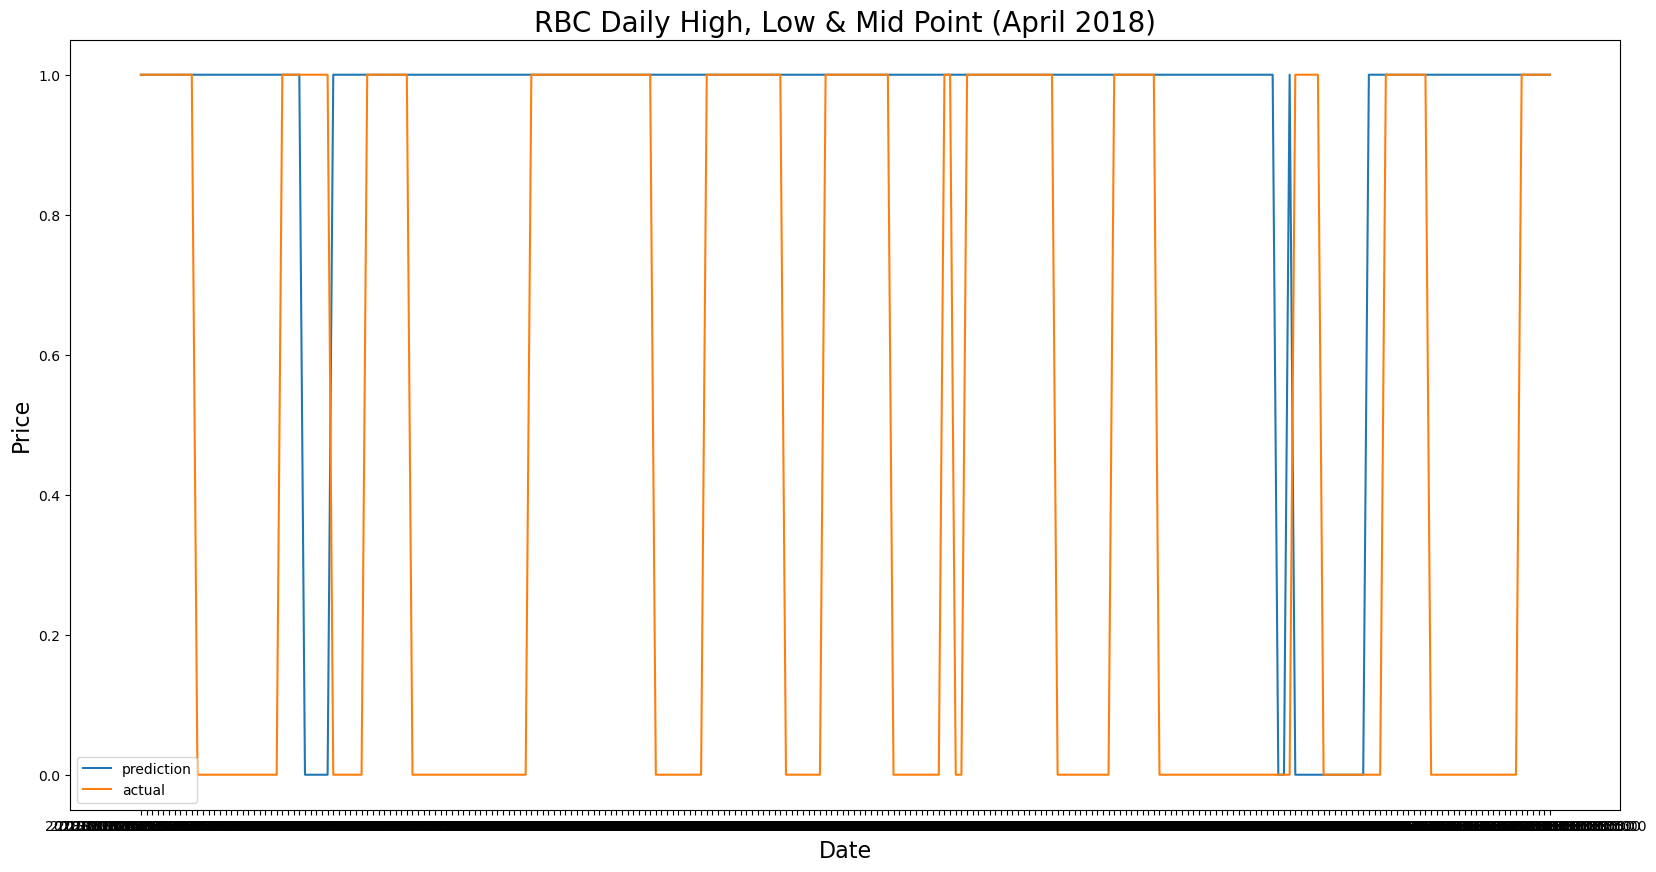

In [14]:
# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_prediction_test)
plt.title("RBC Daily High, Low & Mid Point (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_prediction_test.columns)
#plt.grid()

plt.show()

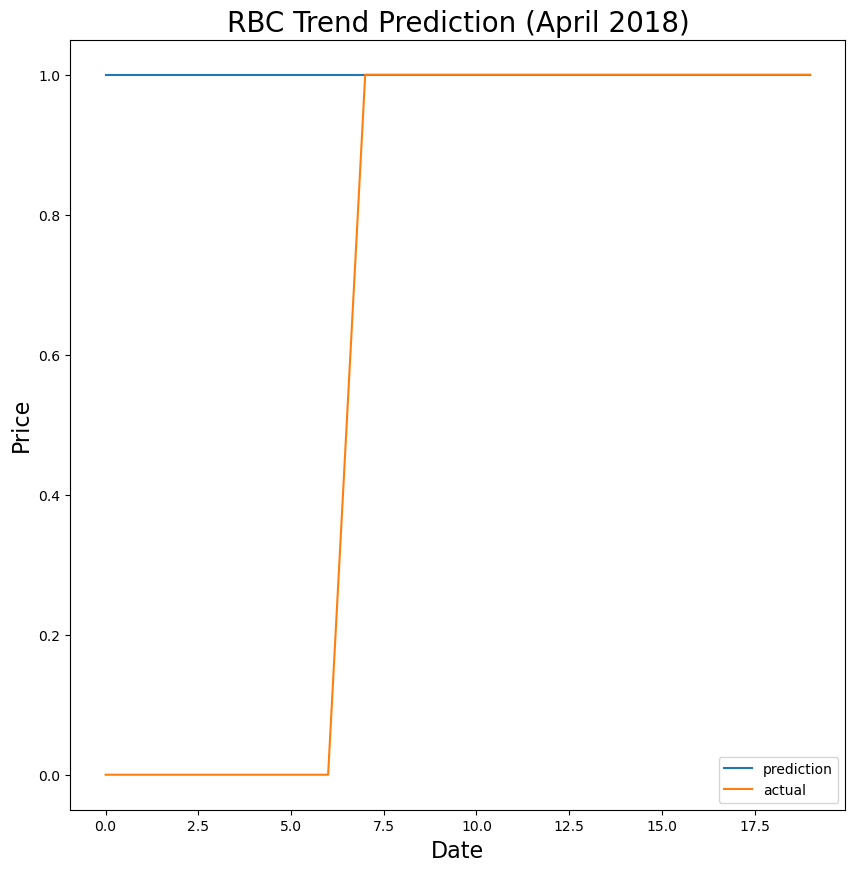

In [15]:
# Data April 2018
df_plt2 = df_prediction_test.loc['2018-04-01':'2018-04-30']
df_plt2 = df_plt2.reset_index()
df_plt2 = df_plt2.drop(columns = ['Date'])
df_plt2.columns

# Plot daily returns of all portfolios
fig = plt.figure(figsize=(10,10))

plt.plot(df_plt2)
plt.title("RBC Trend Prediction (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_plt2.columns)
#plt.grid()

plt.show()

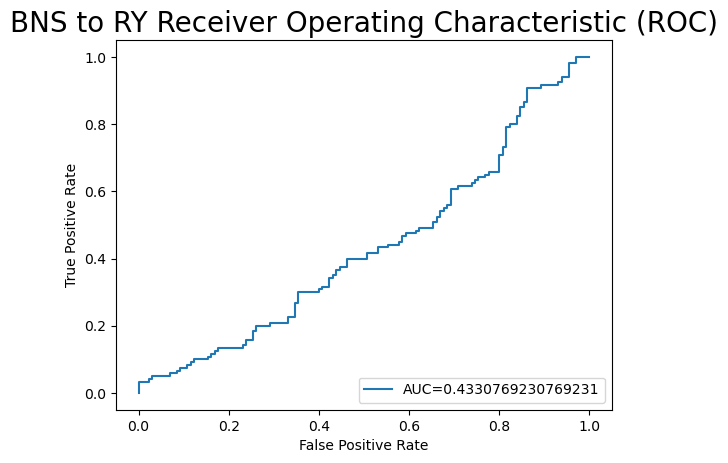

In [17]:
X_test = X_Test
y_test = Y_Test
y_pred_proba = predictions_test
log_regression = classifier

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("BNS to RY Receiver Operating Characteristic (ROC)", fontsize = 20)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()